# PLOT: Top usuarios mas mencionados en tweets

In [50]:
#IMPORTS
%run Functions.ipynb
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time
import category_encoders as ce

from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import Imputer

In [51]:
# Predictions de juguete
n =3263
predictions = np.arange(n)
for i in range(len(predictions)):
    predictions[i]=random.choice([0,1])
    

In [52]:
#CARGA DATA
train = pd.read_csv("Data/train.csv")
to_predict = pd.read_csv("Data/test.csv")


In [53]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


### Completo cosas

In [54]:
train.fillna("Nothing", inplace= True)
keyword_in_text(train)

train.drop(columns=["id"], axis=1,inplace = True)

train.drop(columns=["location"], axis=1,inplace = True)


len_(train)
word_count(train)
train['keyword'] = train['keyword'].str.replace('%',' ')
train['keyword'] = train['keyword'].str.replace('2','')
train['keyword'] = train['keyword'].str.replace('0','')
train.drop(columns=["text"], axis=1,inplace = True)


c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Pongo algun Feature

In [55]:
train["Tiene_key_impor"] = (train["keyword"] == "wreckage") | (train["keyword"] == "debris") | (train["keyword"] == "derailment") 
#| (train["keyword"] == "outbreak") | (train["keyword"] == "oil split")\
#| (train["keyword"] == "typhoon") | (train["keyword"] == "suicide bombing") | (train["keyword"] == "suicide bomber")

train["Tiene_key_no_impor"] = (train["keyword"] == "aftershock")

from sklearn.preprocessing import LabelEncoder

# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train.columns[categorical_feature_mask].tolist()
categorical_cols

le = LabelEncoder()

# apply le on categorical feature columns
train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col))

In [56]:
categorical_cols

['keyword']

In [57]:
x = train[train.columns.drop("target")]
y = train['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.18)

print(f"Original shapes: X={x.shape} y={y.shape}")
print(f"Train shapes: X={x_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={x_test.shape}  y={y_test.shape}")





Original shapes: X=(7613, 6) y=(7613,)
Train shapes: X=(6242, 6) y=(6242,)
Test  shapes: X=(1371, 6)  y=(1371,)


In [58]:
train.head(10)

,keyword,target,contains_keyword,len,word_count,Tiene_key_impor,Tiene_key_no_impor
0,0,1,False,69,13,False,False
1,0,1,False,38,7,False,False
2,0,1,False,133,22,False,False
3,0,1,False,65,9,False,False
4,0,1,False,88,17,False,False
5,0,1,False,110,18,False,False
6,0,1,False,95,14,False,False
7,0,1,False,59,15,False,False
8,0,1,False,79,12,False,False
9,0,1,False,52,10,False,False


### Fit

In [59]:
k = list(range(2,40))
prueba = pd.DataFrame(k,index=k,columns=["Kactual"])

In [60]:
dists = [
"euclidean",
"manhattan",
"chebyshev"]


knn_best_distance(prueba,dists,x_train,y_train,x_test,y_test)

euclidean --------------------------
con k:  2
Entrenamiento: 82.3294%
Testeo: 65.2808%.
F1 score: 0.4860.
   
con k:  3
Entrenamiento: 81.4803%
Testeo: 63.0197%.
F1 score: 0.5685.
   
con k:  4
Entrenamiento: 77.4752%
Testeo: 65.1349%.
F1 score: 0.5230.
   
con k:  5
Entrenamiento: 77.1227%
Testeo: 64.5514%.
F1 score: 0.5818.
   
con k:  6
Entrenamiento: 75.6168%
Testeo: 64.5514%.
F1 score: 0.5282.
   
con k:  7
Entrenamiento: 75.0721%
Testeo: 64.4055%.
F1 score: 0.5815.
   
con k:  8
Entrenamiento: 73.6623%
Testeo: 64.6244%.
F1 score: 0.5429.
   
con k:  9
Entrenamiento: 73.6302%
Testeo: 63.8950%.
F1 score: 0.5736.
   
con k:  10
Entrenamiento: 72.6370%
Testeo: 64.1138%.
F1 score: 0.5323.
   
con k:  11
Entrenamiento: 72.4287%
Testeo: 63.6032%.
F1 score: 0.5687.
   
con k:  12
Entrenamiento: 71.6437%
Testeo: 64.4785%.
F1 score: 0.5419.
   
con k:  13
Entrenamiento: 71.6918%
Testeo: 63.0926%.
F1 score: 0.5600.
   
con k:  14
Entrenamiento: 70.9548%
Testeo: 63.3844%.
F1 score: 0.5317.


Entrenamiento: 66.0846%
Testeo: 60.9774%.
F1 score: 0.5167.
   
con k:  35
Entrenamiento: 65.2195%
Testeo: 60.2480%.
F1 score: 0.5248.
   
con k:  36
Entrenamiento: 65.5880%
Testeo: 60.9044%.
F1 score: 0.5092.
   
con k:  37
Entrenamiento: 65.0433%
Testeo: 60.1751%.
F1 score: 0.5185.
   
con k:  38
Entrenamiento: 64.9792%
Testeo: 60.6127%.
F1 score: 0.5009.
   
con k:  39
Entrenamiento: 65.1554%
Testeo: 60.3209%.
F1 score: 0.5117.
   


(40, -0.1)

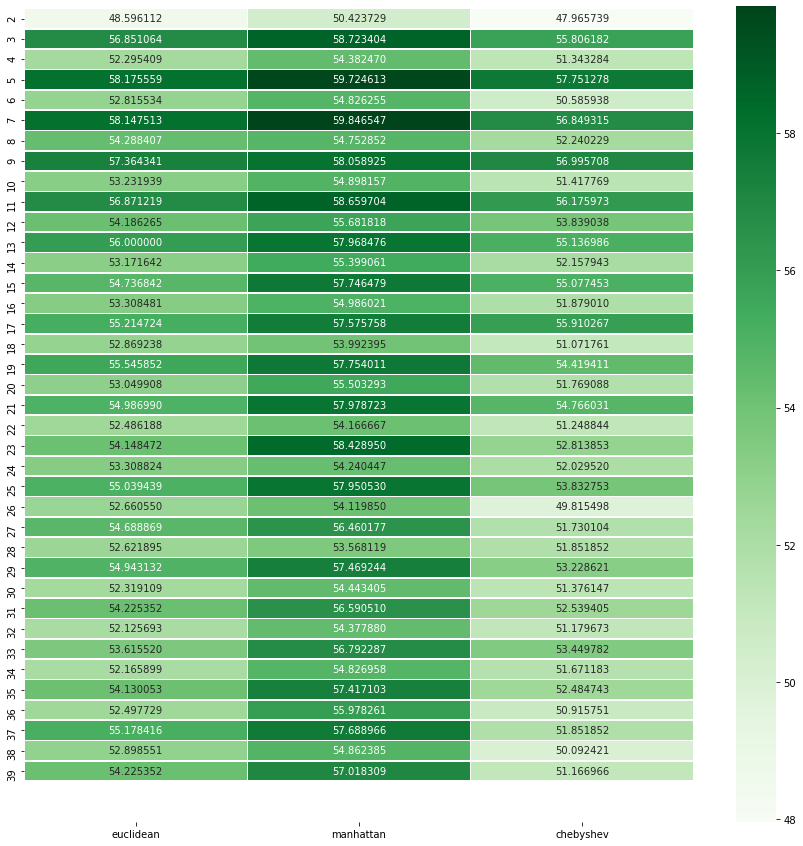

In [61]:
prueba.drop(columns="Kactual",inplace=True)

a= prueba.transform(lambda x: x*100)
plt.figure(figsize=(15, 15))

sns.heatmap(a, annot=True, fmt='.6f', linewidths=.5,cmap="Greens").set_ylim(40,-0.1)

In [63]:
knn = KNeighborsClassifier(n_neighbors =5, metric="manhattan")

knn.fit(x_train, y_train)

res = predecir(knn,x_train,y_train,x_test,y_test)

Entrenamiento: 78.1160%
Testeo: 65.8643%.
F1 score: 0.5972.
   


### Completo Features

In [64]:
to_predict.fillna("Nothing", inplace= True)
keyword_in_text(to_predict)

ids = to_predict["id"]

to_predict.drop(columns=["id"], axis=1,inplace = True)
to_predict.drop(columns=["location"], axis=1,inplace = True)

len_(to_predict)
word_count(to_predict)

to_predict['keyword'] = to_predict['keyword'].str.replace('%',' ')
to_predict['keyword'] = to_predict['keyword'].str.replace('2','')
to_predict['keyword'] = to_predict['keyword'].str.replace('0','')

to_predict.drop(columns=["text"], axis=1,inplace = True)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [65]:
to_predict["Tiene_key_impor"] = (to_predict["keyword"] == "wreckage") | (to_predict["keyword"] == "debris")\
| (to_predict["keyword"] == "derailment")
#| (to_predict["keyword"] == "outbreak")\
#| (to_predict["keyword"] == "oil split") | (to_predict["keyword"] == "typhoon") \
#| (to_predict["keyword"] == "suicide bombing") | (to_predict["keyword"] == "suicide bomber")

to_predict["Tiene_key_no_impor"] = (to_predict["keyword"] == "aftershock")

# Categorical boolean mask
categorical_feature_mask = to_predict.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = to_predict.columns[categorical_feature_mask].tolist()
categorical_cols

le = LabelEncoder()

# apply le on categorical feature columns
to_predict[categorical_cols] = to_predict[categorical_cols].apply(lambda col: le.fit_transform(col))

In [66]:
to_predict["Tiene_key_impor"].value_counts()

False    3228
True       35
Name: Tiene_key_impor, dtype: int64

### Resultado

In [67]:
#Resultado de test
knn = KNeighborsClassifier(n_neighbors = 9, metric="manhattan")

#Entreno con todo el dataset
knn.fit(x, y)

#Predigo la data
predict = knn.predict(to_predict)
predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

### Guardo Submission

In [68]:
result = submission_output(ids, predict,"KNN v1.31 k=5.csv")
result

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
